**"Loading the essential libraries and data, preprocessing"**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

In [16]:
dataset = pd.read_csv('survey lung cancer.csv')

In [18]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [20]:
print(dataset.dtypes)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [22]:
dataset=pd.get_dummies(dataset, columns=['GENDER'], drop_first=True)

In [24]:
dataset

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,True
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,False
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,True
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,True
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,True


In [26]:
x = dataset.iloc[:,0:14]
x['GENDER_M']=dataset['GENDER_M']
y = dataset.iloc[:,-2]

x

In [30]:
y

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

**------------------------------------------**

**Train_Test_Split and preparing the template**


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 72)

In [34]:
def model_train(model):
    model.fit(x_train,y_train)
    
    y_predict = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    
    print("Test",classification_report(y_predict,y_test))
    print("Train",classification_report(y_train_pred,y_train))
    

**Model Selecting and Fitting**

In [36]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_clas = LogisticRegression()
log_clas.fit(x_train,y_train)

LogisticRegression()

In [84]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier

In [86]:
model_train(LogisticRegression())

Test               precision    recall  f1-score   support

          NO       0.75      0.50      0.60         6
         YES       0.95      0.98      0.96        56

    accuracy                           0.94        62
   macro avg       0.85      0.74      0.78        62
weighted avg       0.93      0.94      0.93        62

Train               precision    recall  f1-score   support

          NO       0.71      0.86      0.78        29
         YES       0.98      0.95      0.97       218

    accuracy                           0.94       247
   macro avg       0.85      0.91      0.87       247
weighted avg       0.95      0.94      0.95       247



In [88]:
model_train(RandomForestClassifier())

Test               precision    recall  f1-score   support

          NO       0.50      0.40      0.44         5
         YES       0.95      0.96      0.96        57

    accuracy                           0.92        62
   macro avg       0.72      0.68      0.70        62
weighted avg       0.91      0.92      0.92        62

Train               precision    recall  f1-score   support

          NO       1.00      0.97      0.99        36
         YES       1.00      1.00      1.00       211

    accuracy                           1.00       247
   macro avg       1.00      0.99      0.99       247
weighted avg       1.00      1.00      1.00       247



In [90]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model_train(DecisionTreeClassifier())

Test               precision    recall  f1-score   support

          NO       0.50      0.33      0.40         6
         YES       0.93      0.96      0.95        56

    accuracy                           0.90        62
   macro avg       0.72      0.65      0.67        62
weighted avg       0.89      0.90      0.89        62

Train               precision    recall  f1-score   support

          NO       1.00      0.97      0.99        36
         YES       1.00      1.00      1.00       211

    accuracy                           1.00       247
   macro avg       1.00      0.99      0.99       247
weighted avg       1.00      1.00      1.00       247



**Model Optimization and Best Model Selecting**

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

params = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}


best_estimators = {}
for model_name in models:
    print(f"Model: {model_name}")
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")


Model: RandomForest
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.911265306122449
Model: GradientBoosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score: 0.9112653061224488


In [98]:

import pandas as pd

results = []

for model_name in best_estimators:
    model = best_estimators[model_name]
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='YES')
    recall = recall_score(y_test, y_pred, pos_label='YES')
    f1 = f1_score(y_test, y_pred, pos_label='YES')
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results)
print(results_df)


              Model  Accuracy  Precision    Recall  F1 Score
0      RandomForest  0.919355   0.964912  0.948276  0.956522
1  GradientBoosting  0.919355   0.964912  0.948276  0.956522


In [102]:
!pip install scikit-optimize
from skopt import BayesSearchCV
bayes_search = BayesSearchCV(models[model_name], params[model_name], n_iter=32, cv=5, scoring='accuracy', n_jobs=-1)
bayes_search.fit(x_train,y_train)

   ---------------------------------------- 0.0/107.8 kB ? eta -:--:--
   --- ------------------------------------ 10.2/107.8 kB ? eta -:--:--
   ----------- --------------------------- 30.7/107.8 kB 330.3 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/107.8 kB 281.8 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/107.8 kB 393.8 kB/s eta 0:00:01
   -------------------------------------- 107.8/107.8 kB 480.6 kB/s eta 0:00:00


BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=32,
              n_jobs=-1, scoring='accuracy',
              search_spaces={'learning_rate': [0.01, 0.1, 0.2],
                             'max_depth': [3, 5, 7],
                             'n_estimators': [100, 200]})

In [106]:
best_model = GradientBoostingClassifier(**grid_search.best_params_)
best_model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=5)

**------------------------------------------------------**

**Comparing the best model's predictions with the actual data**

**------------------------------------------------------**

In [108]:
y2_pred = best_model.predict(x_test)

In [175]:
y_test_np = y_test.to_numpy()
y2_pred_reshaped = y2_pred.reshape(-1,1)
y_test_np_reshaped = y_test_np.reshape(-1,1)
result2 = pd.DataFrame(np.concatenate((y_test_np_reshaped, y2_pred_reshaped), axis=1) , columns = ['REAL ', 'PREDICT'])
print(result2)



   REAL  PREDICT
0    YES     YES
1    YES     YES
2    YES     YES
3     NO      NO
4    YES      NO
..   ...     ...
57   YES     YES
58   YES     YES
59   YES     YES
60   YES     YES
61   YES     YES

[62 rows x 2 columns]


Confusion Matrix:
[[ 2  2]
 [ 3 55]]


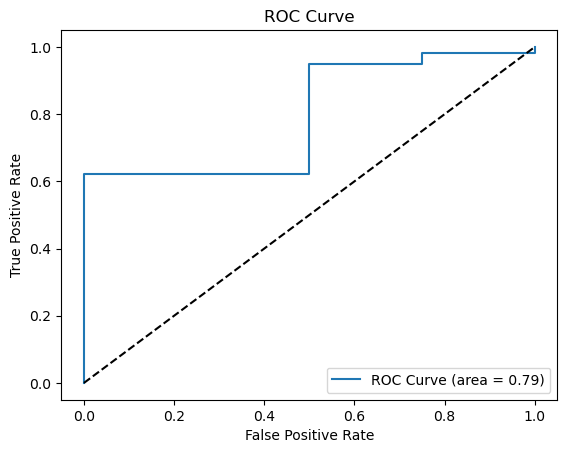

In [179]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

y_pred = best_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

y_prob = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='YES')
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Finding Cross Val Score**

In [209]:
from sklearn.model_selection import cross_val_score
crossval_score = cross_val_score(best_model, x , y, cv = 5, scoring = 'accuracy')

In [211]:
print(f"Cross-validation accuracy scores: {crossval_score}")

Cross-validation accuracy scores: [0.87096774 0.83870968 0.9516129  0.91935484 0.93442623]
